# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [3]:
client = MongoClient(mongod_connect)
db = client.gp1 # use or create a database named demo
tweet_collection = db.lab10 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [6]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1349463418022092806
1349463418286321664
1349463418575601666
1349463419083235328
1349463419557195777
1349463420433793025
1349463420572037121
1349463420614021121
1349463420861632512
1349463422723735552
1349463422610583553
1349463423403356164
1349463423424331776
1349463423843770371
1349463424741347330
1349463424984604672
1349463425944936448
1349463426154819584
1349463426226073603
1349463426557497345
1349463426649579520
1349463427379589122
1349463427614461954
1349463428763693061
1349463428902002689
1349463429401243653
1349463430105710592
1349463430185574416
1349463430110081026
1349463430931988480
1349463431104049157
1349463431267688448
1349463432769265665
1349463432911679489
1349463432827957249
1349463433293553666
1349463433675231241
1349463432811081729
1349463433629093888
1349463433763282950
1349463434010755072


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [7]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [8]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [9]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Wed Jan 13 21:09:11 +0000 2021'
'Wed Jan 13 21:09:11 +0000 2021'
'Wed Jan 13 21:09:10 +0000 2021'
'Wed Jan 13 21:09:10 +0000 2021'
'Wed Jan 13 21:09:10 +0000 2021'
'Wed Jan 13 21:09:10 +0000 2021'
'Wed Jan 13 21:09:10 +0000 2021'
'Wed Jan 13 21:09:10 +0000 2021'
'Wed Jan 13 21:09:10 +0000 2021'
'Wed Jan 13 21:09:10 +0000 2021'
'Wed Jan 13 21:09:09 +0000 2021'
'Wed Jan 13 21:09:09 +0000 2021'
'Wed Jan 13 21:09:09 +0000 2021'
'Wed Jan 13 21:09:09 +0000 2021'
'Wed Jan 13 21:09:09 +0000 2021'
'Wed Jan 13 21:09:08 +0000 2021'
'Wed Jan 13 21:09:08 +0000 2021'
'Wed Jan 13 21:09:08 +0000 2021'
'Wed Jan 13 21:09:08 +0000 2021'
'Wed Jan 13 21:09:08 +0000 2021'
'Wed Jan 13 21:09:07 +0000 2021'
'Wed Jan 13 21:09:07 +0000 2021'
'Wed Jan 13 21:09:07 +0000 2021'
'Wed Jan 13 21:09:07 +0000 2021'
'Wed Jan 13 21:09:06 +0000 2021'
'Wed Jan 13 21:09:06 +0000 2021'
'Wed Jan 13 21:09:06 +0000 2021'
'Wed Jan 13 21:09:05 +0000 2021'
'Wed Jan 13 21:09:05 +0000 2021'
'Wed Jan 13 21:09:05 +0000 2021'
'Wed Jan 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [15]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                       max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Wed Jan 13 21:01:01 +0000 2021'
'Wed Jan 13 21:01:00 +0000 2021'
'Wed Jan 13 21:01:00 +0000 2021'
'Wed Jan 13 21:01:00 +0000 2021'
'Wed Jan 13 21:01:00 +0000 2021'
'Wed Jan 13 21:01:00 +0000 2021'
'Wed Jan 13 21:01:00 +0000 2021'
'Wed Jan 13 21:01:00 +0000 2021'
'Wed Jan 13 21:01:00 +0000 2021'
'Wed Jan 13 21:01:00 +0000 2021'
'Wed Jan 13 21:01:00 +0000 2021'
'Wed Jan 13 21:00:59 +0000 2021'
'Wed Jan 13 21:00:59 +0000 2021'
'Wed Jan 13 21:00:59 +0000 2021'
'Wed Jan 13 21:00:59 +0000 2021'
'Wed Jan 13 21:00:59 +0000 2021'
'Wed Jan 13 21:00:58 +0000 2021'
'Wed Jan 13 21:00:58 +0000 2021'
'Wed Jan 13 21:00:58 +0000 2021'
'Wed Jan 13 21:00:58 +0000 2021'
'Wed Jan 13 21:00:58 +0000 2021'
'Wed Jan 13 21:00:57 +0000 2021'
'Wed Jan 13 21:00:57 +0000 2021'
'Wed Jan 13 21:00:57 +0000 2021'
'Wed Jan 13 21:00:57 +0000 2021'
'Wed Jan 13 21:00:57 +0000 2021'
'Wed Jan 13 21:00:57 +0000 2021'
'Wed Jan 13 21:00:57 +0000 2021'
'Wed Jan 13 21:00:57 +0000 2021'
'Wed Jan 13 21:00:57 +0000 2021'
'Wed Jan 1

'Wed Jan 13 21:00:24 +0000 2021'
'Wed Jan 13 21:00:24 +0000 2021'
'Wed Jan 13 21:00:24 +0000 2021'
'Wed Jan 13 21:00:24 +0000 2021'
'Wed Jan 13 21:00:24 +0000 2021'
'Wed Jan 13 21:00:23 +0000 2021'
'Wed Jan 13 21:00:23 +0000 2021'
'Wed Jan 13 21:00:23 +0000 2021'
'Wed Jan 13 21:00:23 +0000 2021'
'Wed Jan 13 21:00:23 +0000 2021'
'Wed Jan 13 21:00:23 +0000 2021'
'Wed Jan 13 21:00:23 +0000 2021'
'Wed Jan 13 21:00:23 +0000 2021'
'Wed Jan 13 21:00:23 +0000 2021'
'Wed Jan 13 21:00:23 +0000 2021'
'Wed Jan 13 21:00:23 +0000 2021'
'Wed Jan 13 21:00:23 +0000 2021'
'Wed Jan 13 21:00:22 +0000 2021'
'Wed Jan 13 21:00:22 +0000 2021'
'Wed Jan 13 21:00:22 +0000 2021'
'Wed Jan 13 21:00:22 +0000 2021'
'Wed Jan 13 21:00:22 +0000 2021'
'Wed Jan 13 21:00:22 +0000 2021'
'Wed Jan 13 21:00:22 +0000 2021'
'Wed Jan 13 21:00:22 +0000 2021'
'Wed Jan 13 21:00:22 +0000 2021'
'Wed Jan 13 21:00:22 +0000 2021'
'Wed Jan 13 21:00:21 +0000 2021'
'Wed Jan 13 21:00:21 +0000 2021'
'Wed Jan 13 21:00:21 +0000 2021'
'Wed Jan 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [16]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

19407
16500


Create a text index and print the Tweets containing specific keywords. 

In [17]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [18]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [19]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Murgia Michele Angelo
text: Does Trump care about the 391,950 Covid19 deaths in his country? Nope, his only concern is himself full of anger for not being elected
----
name: DONA VAN ECK
text: RT @DrEricDing: ZERO MASKS worn by any South Dakota elected leader or staffer in this photo just before @govkristinoem statewide speech.…
----
name: Onward & Upward!
text: RT @DrEricDing: ZERO MASKS worn by any South Dakota elected leader or staffer in this photo just before @govkristinoem statewide speech.…
----
name: Eileen
text: RT @DrEricDing: ZERO MASKS worn by any South Dakota elected leader or staffer in this photo just before @govkristinoem statewide speech.…
----
name: Mary Jo Jones
text: RT @DrEricDing: ZERO MASKS worn by any South Dakota elected leader or staffer in this photo just before @govkristinoem statewide speech.…
----
name: Shannon Adele Allen
text: RT @DrEricDing: ZERO MASKS worn by any South Dakota elected leader or staffer in this photo just before @govkristinoem

In [20]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [21]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,possibly_sensitive,quote_count,reply_count,filter_level,timestamp_ms,extended_tweet
0,5fff6202db94495134b3214a,Wed Jan 13 21:02:39 +0000 2021,1349461885142368258,1349461885142368258,"Does Trump care about the 391,950 Covid19 deat...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fff6209db94495134b323c5,Wed Jan 13 21:01:05 +0000 2021,1349461487342002183,1349461487342002183,RT @DrEricDing: ZERO MASKS worn by any South D...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",None,...,{'created_at': 'Wed Jan 13 11:49:27 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fff6206db94495134b32295,Wed Jan 13 21:01:42 +0000 2021,1349461645974622208,1349461645974622208,RT @DrEricDing: ZERO MASKS worn by any South D...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",None,...,{'created_at': 'Wed Jan 13 11:49:27 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fff6205db94495134b32260,Wed Jan 13 21:01:52 +0000 2021,1349461684474290179,1349461684474290179,RT @DrEricDing: ZERO MASKS worn by any South D...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,{'created_at': 'Wed Jan 13 11:49:27 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fff61ffdb94495134b32082,Wed Jan 13 21:03:18 +0000 2021,1349462045549330433,1349462045549330433,RT @DrEricDing: ZERO MASKS worn by any South D...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",None,...,{'created_at': 'Wed Jan 13 11:49:27 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5fff61cadb94495134b31a06,Wed Jan 13 21:08:02 +0000 2021,1349463238010839040,1349463238010839040,RT @DrEricDing: ZERO MASKS worn by any South D...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",None,...,{'created_at': 'Wed Jan 13 11:49:27 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fff61c8db94495134b3198d,Wed Jan 13 21:08:28 +0000 2021,1349463345431269376,1349463345431269376,"""The people of the state have chosen divided g...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://about.twitter.com/products/tw...",None,...,NaN,1.349460e+18,1349460442482171911,{'created_at': 'Wed Jan 13 20:56:55 +0000 2021...,False,NaN,NaN,NaN,NaN,NaN
7,5fff6059f7ee4e22d66bbde4,Wed Jan 13 21:04:20 +0000 2021,1349462306879541250,1349462306879541250,RT @DrEricDing: ZERO MASKS worn by any South D...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",None,...,{'created_at': 'Wed Jan 13 11:49:27 +0000 2021...,NaN,NaN,NaN,NaN,0.0,0.0,low,1610571860414,NaN
8,5fff6039f7ee4e22d66bbcaa,Wed Jan 13 21:03:48 +0000 2021,1349462173462847488,1349462173462847488,RT @DrEricDing: ZERO MASKS worn by any South D...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",None,...,{'created_at': 'Wed Jan 13 11:49:27 +0000 2021...,NaN,NaN,NaN,NaN,0.0,0.0,low,1610571828605,NaN
9,5fff6027f7ee4e22d66bbbf9,Wed Jan 13 21:03:30 +0000 2021,1349462098577915906,1349462098577915906,RT @DrEricDing: ZERO MASKS worn by any South D...,False,"{'hashtags': [], 'urls': []

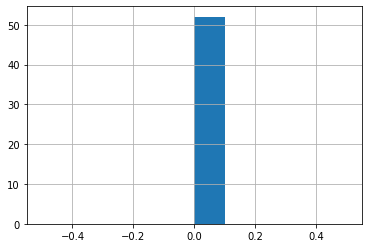

In [22]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count